In [1]:
%matplotlib inline

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

x_train = x_train/255
x_test = x_test/255

x_train = x_train.reshape(60000, 28, 28, 1)

x_test = x_test.reshape(10000, 28, 28, 1)

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)

y_test = to_categorical(y_test, 10)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten ##拉平
from tensorflow.keras.optimizers import SGD

model = Sequential()

model.add(Conv2D(16,(3,3), padding='same',
                input_shape=(28,28,1),
                activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), padding='same',
                activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding='same', 
                activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(54,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 函式改用 Cross Entropy 
### optimizer 改用 Adam

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [3]:
model.fit(x_train, y_train, batch_size=150, epochs=1)
result = model.predict_classes(x_test)

Train on 60000 samples
60000/60000 [==============================] - 35s 592us/sample - loss: 0.6381 - accuracy: 0.7699- loss:


神經網路預測這是 Ankle boot


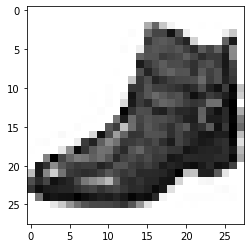

In [4]:
n = 1440
print("神經網路預測這是",class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

NameError: name 'train_generator' is not defined

In [14]:
# 訓練
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255) # 驗證集不用增強

In [18]:
train_generator = train_datagen.flow_from_directory(
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

TypeError: flow_from_directory() missing 1 required positional argument: 'directory'

In [15]:
train_history = model.fit_generator(train_generator,
                                    steps_per_epoch=60000/300,
                                    epochs=10, 
                                    validation_data=test_generator,
                                    validation_steps=10000/300)

NameError: name 'train_generator' is not defined